In [124]:
import pandas as pd 
import numpy as np

In [125]:
df = pd.read_csv(r"C:\Users\Yuvraj Bhavsar\OneDrive\Desktop\csv file\Salary_Data[1].csv")
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [126]:
df.tail()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
6699,49.0,Female,PhD,Director of Marketing,20.0,200000.0
6700,32.0,Male,High School,Sales Associate,3.0,50000.0
6701,30.0,Female,Bachelor's Degree,Financial Manager,4.0,55000.0
6702,46.0,Male,Master's Degree,Marketing Manager,14.0,140000.0
6703,26.0,Female,High School,Sales Executive,1.0,35000.0


# Data Cleaning

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


In [128]:
df.isnull().sum()

Age                    2
Gender                 2
Education Level        3
Job Title              2
Years of Experience    3
Salary                 5
dtype: int64

In [129]:
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [130]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

### Handle missing values
##### For numerical columns, fill missing values with the mean

In [131]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df['Years of Experience'] = df['Years of Experience'].fillna(df['Years of Experience'].mean())
df['Salary'] = df['Salary'].fillna(df['Salary'].mean())

In [132]:
df.isnull().sum()

Age                    0
Gender                 2
Education Level        3
Job Title              2
Years of Experience    0
Salary                 0
dtype: int64

##### For categorical columns, fill missing values with the mode

In [133]:
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Education Level'] = df['Education Level'].fillna(df['Education Level'].mode()[0])
df['Job Title'] = df['Job Title'].fillna(df['Job Title'].mode()[0])

In [134]:
df.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64

# Visualizations 

### Scatterplot

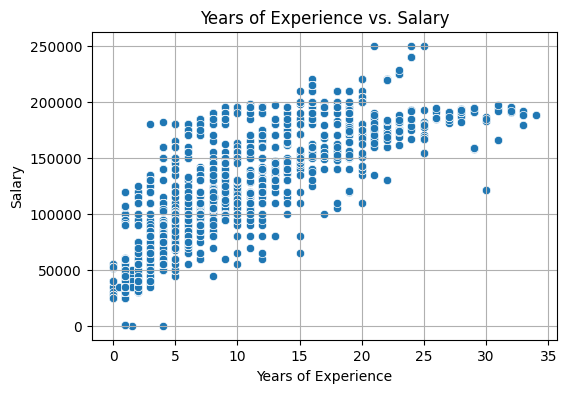

In [137]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(6, 4))
sns.scatterplot(x='Years of Experience', y='Salary', data=df)
plt.title('Years of Experience vs. Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

### Boxplot

C:\Users\Yuvraj Bhavsar\AppData\Local\Temp\ipykernel_36804\4040302176.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Gender', y='Salary', data=df, palette='Set2')  # Use a colorful palette


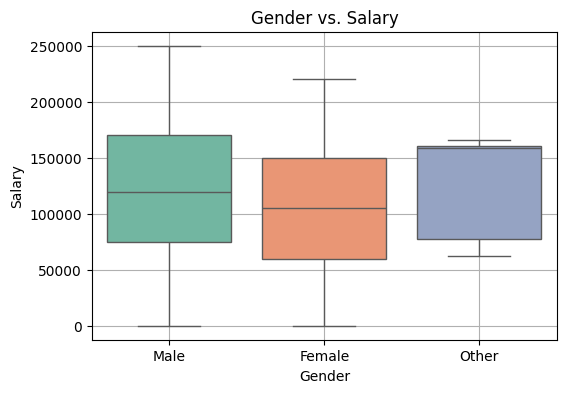

In [138]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Gender', y='Salary', data=df, palette='Set2')  # Use a colorful palette
plt.title('Gender vs. Salary')
plt.xlabel('Gender')
plt.ylabel('Salary')
plt.grid(True)
plt.show()


### Pie Chart

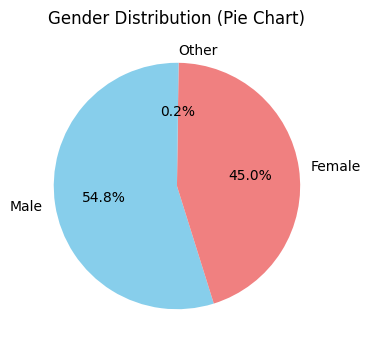

In [139]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(4, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Gender Distribution (Pie Chart)')
plt.show()

### Violinplot

C:\Users\Yuvraj Bhavsar\AppData\Local\Temp\ipykernel_36804\2755138413.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Education Level', y='Salary', data=df, palette='muted')


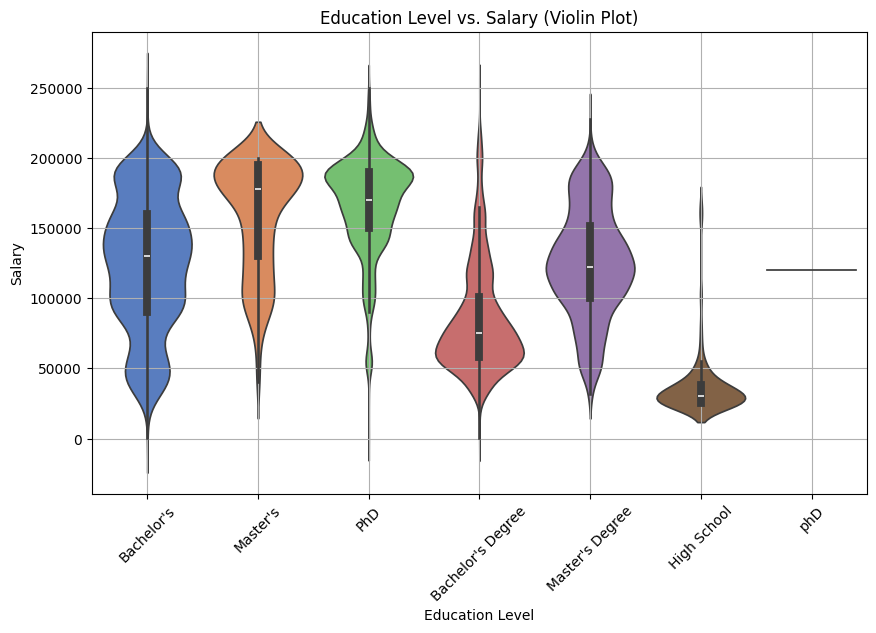

In [140]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Education Level', y='Salary', data=df, palette='muted')
plt.title('Education Level vs. Salary (Violin Plot)')
plt.xlabel('Education Level')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Label encoding for ['Gender', 'Education Level', 'Job Title']


In [141]:
label_columns = ['Gender', 'Education Level', 'Job Title']
label_encoders = {}
for col in label_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


### Import Libraries

In [142]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


### Train Test Split and Scaling

In [143]:
X=df.drop(columns=['Salary'])
y=df['Salary']
X_poly = PolynomialFeatures(degree=2).fit_transform(X)
scaler = StandardScaler()
X = scaler.fit_transform(X_poly)


In [144]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [145]:
print(X_train.shape)
print(X_test.shape)

(5363, 21)
(1341, 21)


### Apply Models

### Linear Regression

In [146]:
lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)

In [147]:
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2}")

R-squared: 0.8280985015661455


### Ridge

In [148]:
Ridge = Ridge(alpha=1.0)
Ridge.fit(X_train,y_train)
y_pred3 = Ridge.predict(X_test)

In [149]:
r2 = r2_score(y_test, y_pred3)
print(f"R-squared: {r2}")

R-squared: 0.827206953301365


## Advanced model Like RandomForestRegressor and GradientBoostingRegressor

In [150]:
from sklearn.ensemble import RandomForestRegressor
random_forest = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest.fit(X_train, y_train)

y_pred_rf = random_forest.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"R-squared (Random Forest): {r2_rf}")

R-squared (Random Forest): 0.9773294404140356


In [151]:
from sklearn.ensemble import GradientBoostingRegressor
gradient_boost = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gradient_boost.fit(X_train, y_train)

y_pred_gb = gradient_boost.predict(X_test)
r2_gb = r2_score(y_test, y_pred_gb)
print(f"R-squared (Gradient Boosting): {r2_gb}")

R-squared (Gradient Boosting): 0.9395671996832502


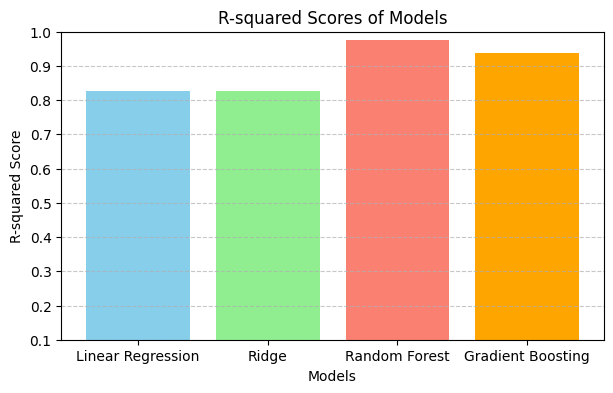

In [152]:
models = ['Linear Regression', 'Ridge', 'Random Forest', 'Gradient Boosting']
r2_scores = [0.828, 0.827, 0.977, 0.939]

plt.figure(figsize=(7, 4))
plt.bar(models, r2_scores, color=['skyblue', 'lightgreen', 'salmon', 'orange'])
plt.title('R-squared Scores of Models')
plt.xlabel('Models')
plt.ylabel('R-squared Score')
plt.ylim(0.1, 1.0)  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


### Conclusion - Salary is mainly influenced by experience, education, job role, and age, with higher positions and advanced degrees leading to better pay. Men tend to earn more than women, but this needs more research. To predict salaries accurately, focus on these factors, handle missing data, and use advanced models like Random Forest or Gradient Boosting for better results.






